**Goal**: To explore **LangChain DeepAgent** -> agents can use filesystems for **context engineering**

A key feature of deep agents from LangChain is their access to a set of filesystem tools. Deep agents can use these tools to read, write, edit, list, and search for files in their filesystem.

**Use the file system as context** :

*(Image credit: Manus)*

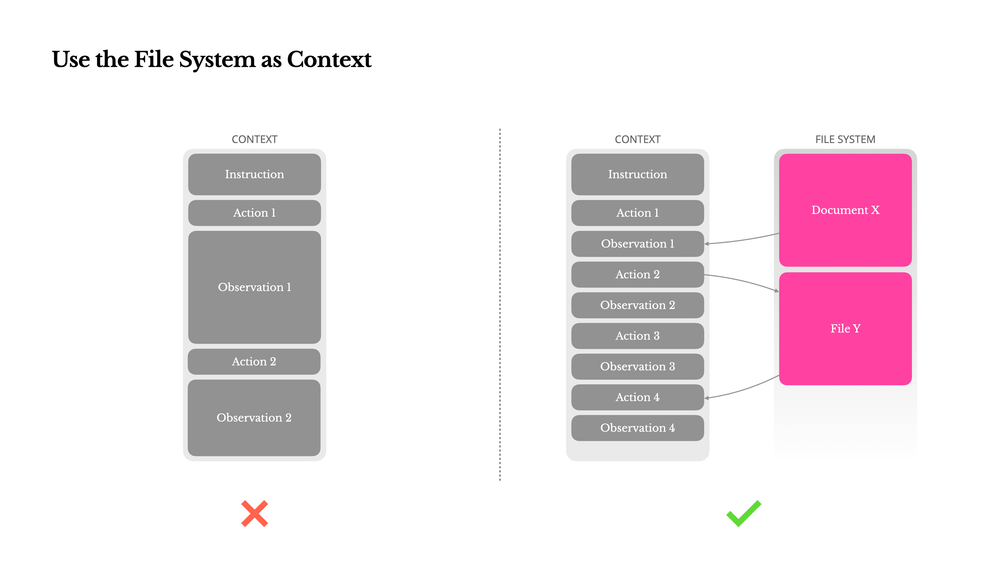

I liked the above shown concept from Manus to use filesystem as context. This concept can pave the way for building more robust, reliable agents and can takle context bloating when running complex tasks. Only needed information can be passed for the agent to perform next action instead of passing unnecessary entire context.

**Let's see how a deep agent can make use of its filesystem**

**Install and Import necessary packages**

In [ ]:
!pip install -U langchain-community langgraph langchain-anthropic tavily-python langgraph-checkpoint-sqlite
!pip install -U "langchain[openai]"

In [ ]:
!pip install deepagents tavily-python

In [3]:
import requests
import json
import os
from langchain.chat_models import init_chat_model
from deepagents import create_deep_agent
from deepagents.backends import FilesystemBackend
from tavily import TavilyClient

**Set API keys**

In [12]:
os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY"
os.environ["TAVILY_API_KEY"] = "TAVILY_API_KEY"

**I will be using OpenAI model gpt-4.1-mini for this task**

In [5]:
model = init_chat_model("openai:gpt-4.1-mini")

**Define a deep agent with simple tavily search tool and access to the backend file system** -> Will test with simple task to get top programming languages of 2025 and then the year they were introduced and finally to get the oldest one from those.

**Prompt used**: Get me the Top 3 programming languages of 2025, write it to result.txt at path /content/Testing_folder/ and then get the year of first time introduction of those languages along with languages and append it to result.txt and then out of those get me only the oldest one based on year

In [9]:
tavily_client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

def internet_search(query: str, max_results: int = 5):
    """Run a web search"""
    return tavily_client.search(query, max_results=max_results)

agent = create_deep_agent(
     model=model,backend=FilesystemBackend(root_dir="/content/Testing_folder/"),
    tools=[internet_search],
    system_prompt="You are an helpful assistant. Use the available tools and file system provided to answer questions and give the results.",
)

result = agent.invoke({"messages": [{"role": "user", "content": "Get me the Top 3 programming languages of 2025, write it to result.txt at path /content/Testing_folder/ and then get the year of first time introduction of those languages along with languages and append it to result.txt and then out of those get me only the oldest one based on year"}]})

**The agent was able to successfully get the result by using file system backend to write, edit and read the content from the files.**

In [10]:
print(result['messages'][-1].content)
final_msg = result["messages"][-1]
print(final_msg.response_metadata)

The top 3 programming languages of 2025 are:
1. Python
2. JavaScript
3. Java

The years of first introduction for these languages are:
- Python: 1991
- JavaScript: 1995
- Java: 1995

Now, the oldest programming language among these is Python, introduced in 1991.
{'token_usage': {'completion_tokens': 75, 'prompt_tokens': 26115, 'total_tokens': 26190, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 25984}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_d0c93c37b1', 'id': 'chatcmpl-Cmf95uVcmk3X9FB1lZjqk8XjQvBDp', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}


**Let's look at how the agent handled the task**

In [11]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

Get me the Top 3 programming languages of 2025, write it to result.txt at path /content/Testing_folder/ and then get the year of first time introduction of those languages along with languages and append it to result.txt and then out of those get me only the oldest one based on year
================================== Ai Message ==================================
Tool Calls:
  internet_search (call_WyLbx9aARISp9XFcRt1FcJzE)
 Call ID: call_WyLbx9aARISp9XFcRt1FcJzE
  Args:
    query: Top programming languages of 2025
    max_results: 5
================================= Tool Message =================================
Name: internet_search

{"query": "Top programming languages of 2025", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://survey.stackoverflow.co/2025/technology", "title": "Technology | 2025 Stack Overflow Developer Survey", "content": "[Twitter/X](https://twit

From the above agentic flow, it can seen that DeepAgent with access to FileSystem was able to write the findings to a file, read and edited when necessary, thus answer the query with ease. The File system as context looks promising to handle context bloating.

**Conclusion**

The Agent with access to File Based System looks quite promising to fill the context window with "**just the right and necessary information**" for agent to take next step or action.